##### clustering algorithms - practice

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
df = pd.read_csv(r'E:\clustering\household_power_consumption.txt', delimiter=';')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [10]:
df.isna().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [8]:
df1 = df.copy()

In [11]:
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [15]:
df1 = df1[['Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2']]

In [16]:
df1.head(1)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2
0,4.216,0.418,234.840,18.400,0.000,1.000


In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 6 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   Global_active_power    object
 1   Global_reactive_power  object
 2   Voltage                object
 3   Global_intensity       object
 4   Sub_metering_1         object
 5   Sub_metering_2         object
dtypes: object(6)
memory usage: 95.0+ MB


In [34]:
df1 = df1[df1['Global_active_power'] != '?']

In [37]:
df1 = df1.astype(float)

In [38]:
df1.isna().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
dtype: int64

In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049280 entries, 0 to 2075258
Data columns (total 6 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
dtypes: float64(6)
memory usage: 109.4 MB


In [42]:
x = df1.values

In [40]:
from sklearn.cluster import KMeans

elbow = []

In [44]:
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(x)
    elbow.append(kmeans.inertia_)

In [45]:
print(elbow)

[211355530.85543743, 125208312.7859387, 64168285.60967881, 44479100.80000281, 38337879.92084488, 33911418.317376636, 28131751.17292556, 24447231.976813335, 21303787.070843194, 19049381.654832132]


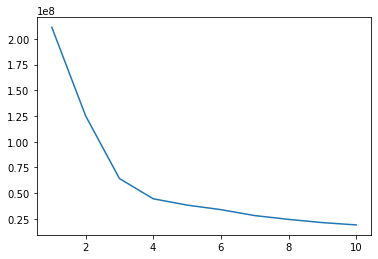

In [46]:
plt.plot(range(1,11), elbow)

In [47]:
#going with 4 clusters as per elbow

In [48]:
# applying kmeans with 4 clusters

kmeans = KMeans(n_clusters=4, init='k-means++')
y_kmeans = kmeans.fit_predict(x)

In [49]:
y_kmeans

array([1, 1, 1, ..., 2, 2, 2])

In [52]:
result_df = pd.concat([df1, pd.DataFrame(y_kmeans)], axis=1)

In [54]:
result_df.shape

(2075259, 7)

In [55]:
result_df.dropna(inplace=True)

In [56]:
result_df.shape

(2023301, 7)

In [57]:
result_df.columns

Index([  'Global_active_power', 'Global_reactive_power',
                     'Voltage',      'Global_intensity',
              'Sub_metering_1',        'Sub_metering_2',
                             0],
      dtype='object')

In [59]:
result_df[0].value_counts()

2.0    1233090
1.0     687132
0.0      55229
3.0      47850
Name: 0, dtype: int64

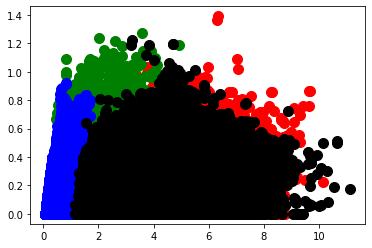

In [60]:
plt.scatter(x[y_kmeans==0, 0], x[y_kmeans==0, 1], s=100, c='r')
plt.scatter(x[y_kmeans==1, 0], x[y_kmeans==1, 1], s=100, c='g')
plt.scatter(x[y_kmeans==2, 0], x[y_kmeans==2, 1], s=100, c='b')
plt.scatter(x[y_kmeans==3, 0], x[y_kmeans==3, 1], s=100, c='k')

######## silhoutee score

In [61]:
from sklearn.metrics import silhouette_score

In [65]:
#silhouette_score(x, y_kmeans)